In [1]:
import numpy as np # linear algebra
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv


In [2]:
# Reading the Data

songs = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv')
songs.head(5)

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [3]:
songs.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [4]:
import seaborn as sns
%matplotlib inline

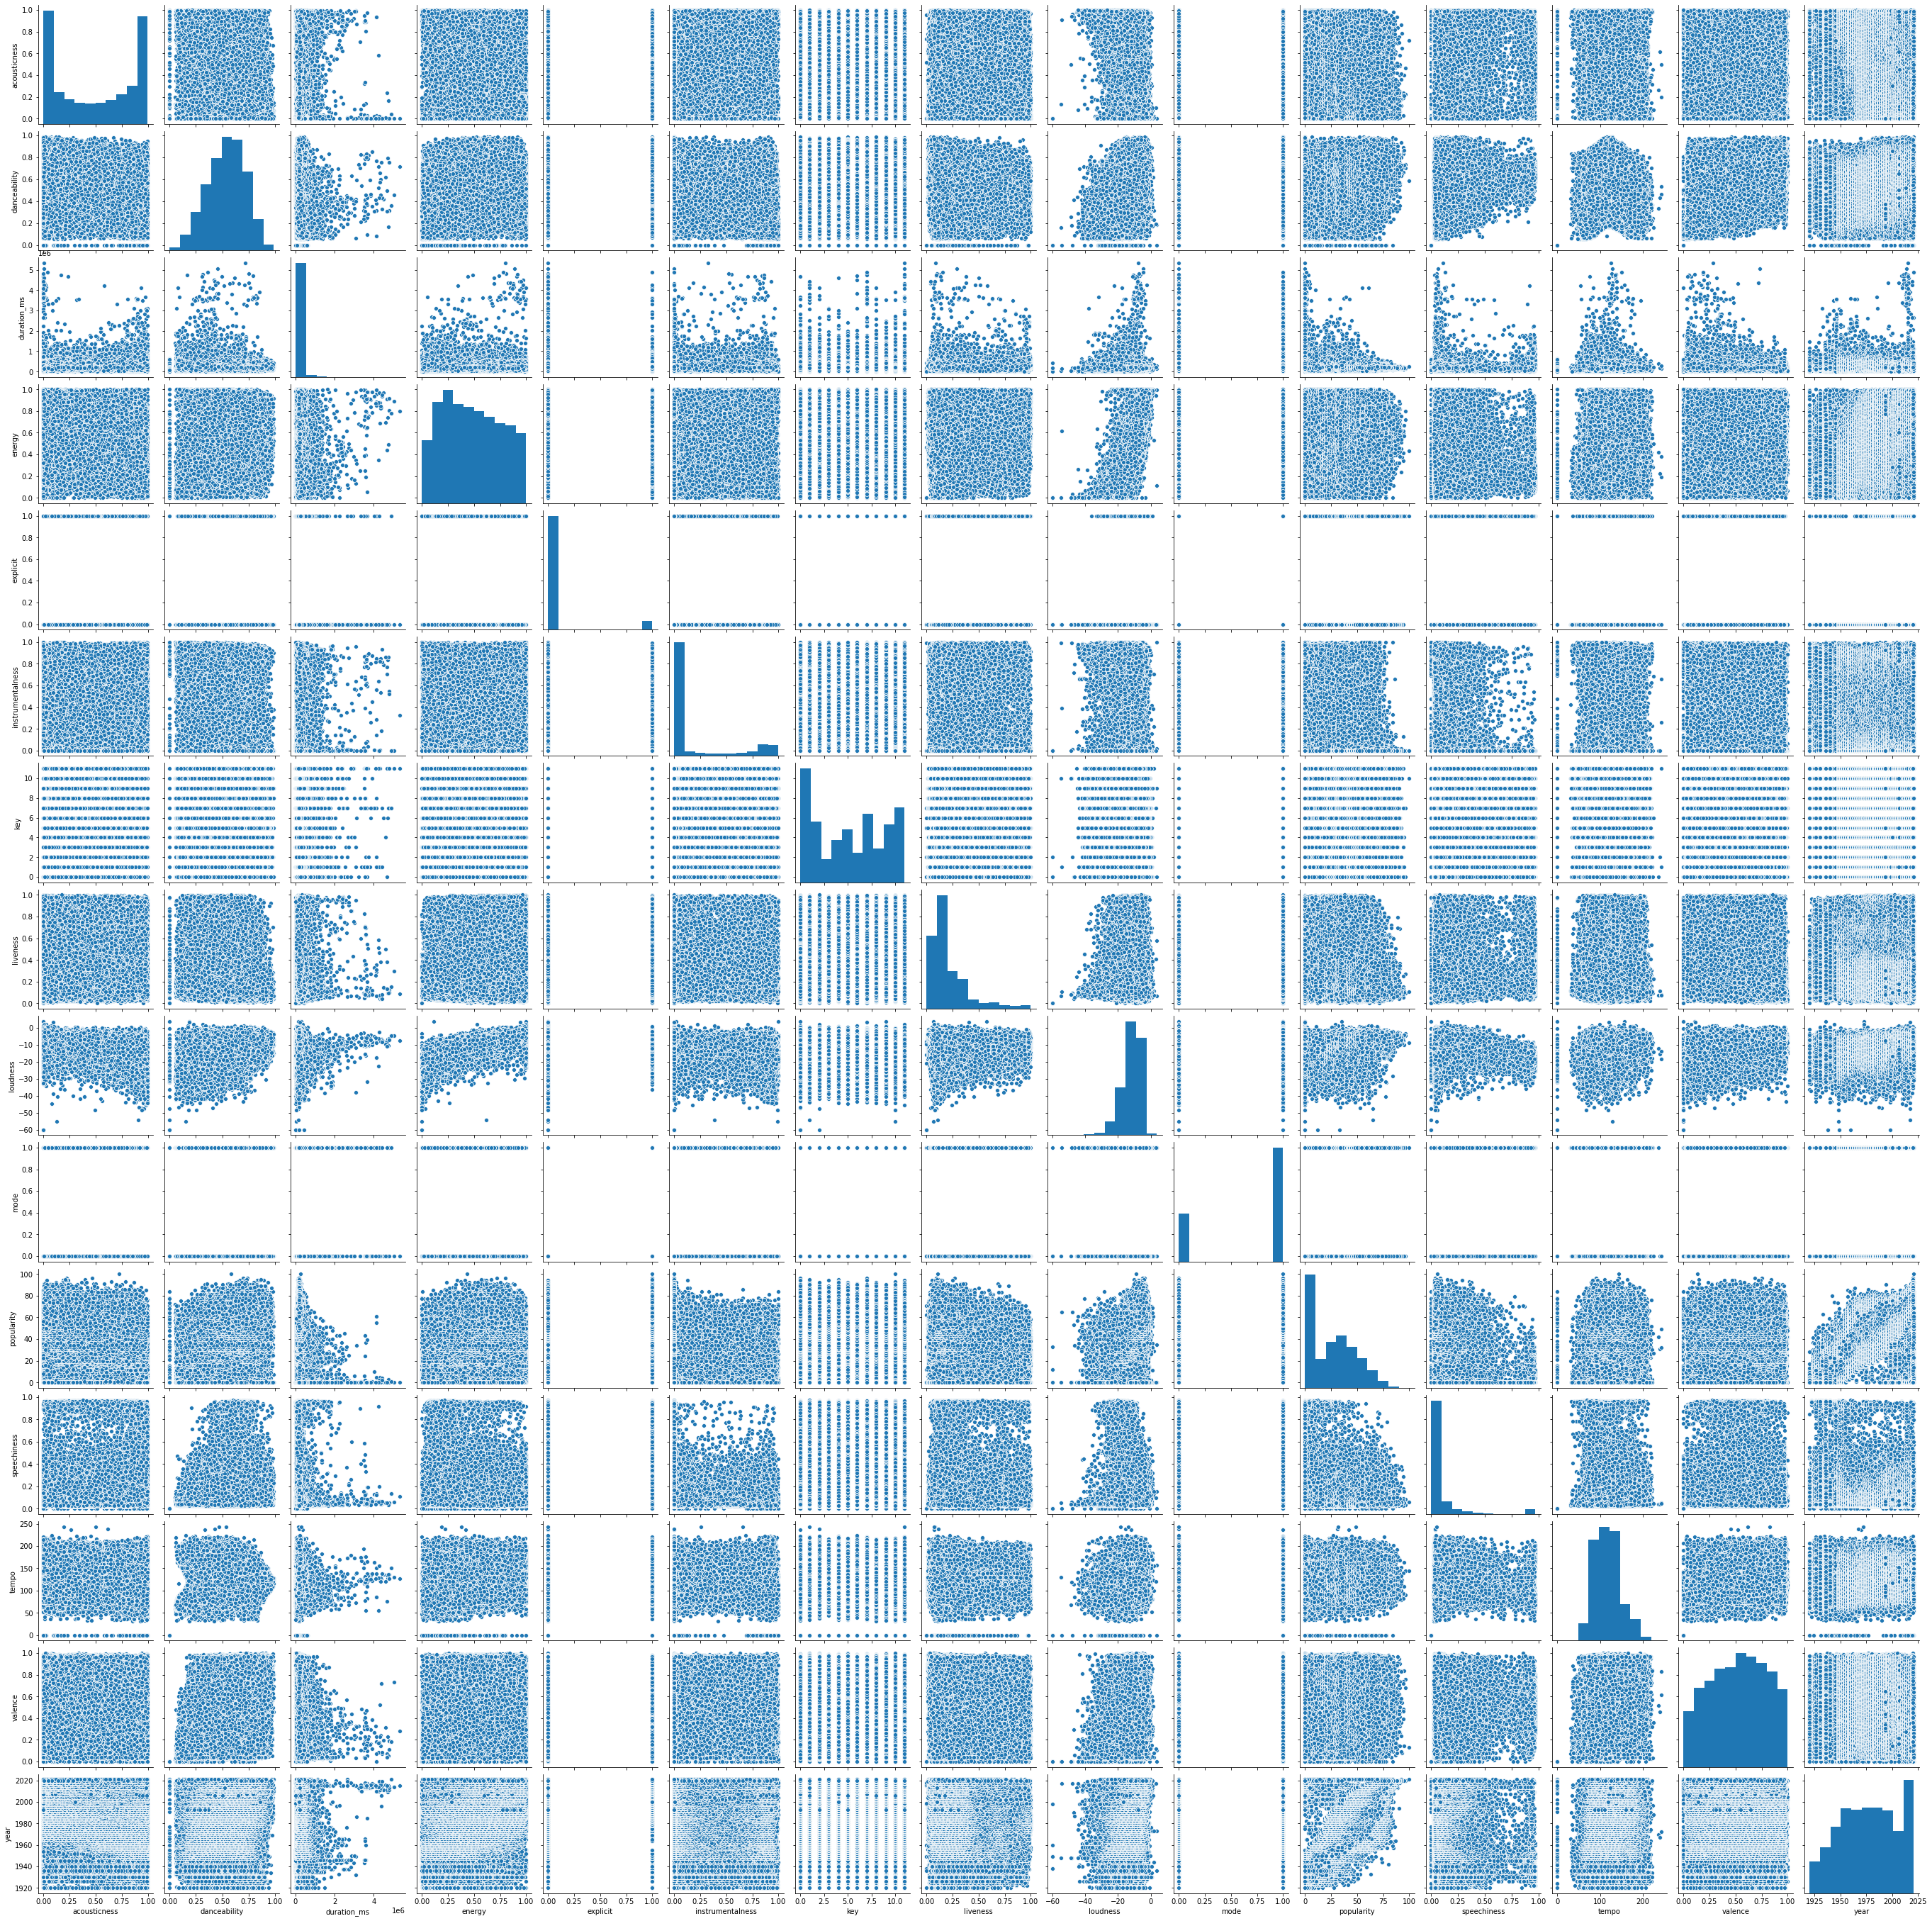

In [5]:
sns.pairplot(songs)

In [6]:
music_by_genres = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
music_by_genres.head(5)

artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.598500   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.470100  267072.000000  0.376203          0.010261  0.283050   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.467143  270436.142857  0.488286          0.009400  0.195000   

    loudness  speechiness       tempo   valence  popularity  key  mode  count  \
0 -14.434300     0.209150  114.128800  0.358320   38.200000    5     1     10   
1 -10.690000     0.176212  103.044154  0.268865   31.538462    5     1     26   
2 -15.230714     0.118514   77.375857  0.354857   34.571429    0     1      7   
3 -15.639370     0.123200   88.667630  0.372030   34.407407    0     1     27   
4 -10.236714     0.098543  122.835857  0.482286   42.000000    5     1      7   

           genres  
0  ['show tunes']  
1              []  
2              []  
3              []  
4              []

In [7]:
all_genres = set()
for _, row in music_by_genres.iterrows():
    genrelist = row.genres
    if genrelist == "[]":
        continue
    genrelist = genrelist[1:-1].split(", ")
    for genre in genrelist:
        all_genres.add(genre.replace("'", ""))


print(all_genres)


{'kashmiri pop', 'boston hip hop', 'emo punk', 'west end', 'welsh metal', 'french death metal', 'electronic djent', 'sefardi', 'j-rap', 'brazilian rock', 'afro house', 'zambian pop', 'goa trance', 'doomcore', 'rock-and-roll', 'syrian pop', 'italian classical piano', 'calgary indie', 'puerto rican rock', 'electronicore', 'texas blues', 'recorder', 'microtonal', 'deep acoustic pop', 'venezuelan hip hop', 'seattle hip hop', 'makossa', 'halftime dnb', 'neo-pagan', 'iskelma', 'manguebeat', '"canzone dautore"', 'indian jazz', 'danspunk', 'uk dnb', 'south african rock', 'jam band', 'melodic metal', 'uk alternative hip hop', 'pagode baiano', 'hawaiian indie', 'british choir', 'japanese folk', 'saskatchewan indie', 'amapiano', 'focus', 'rhode island indie', 'dhrupad', 'rock andaluz', 'deep classic garage rock', 'latin christian', 'vallenato', 'rock progressif francais', 'bboy', 'sufi', 'german tech house', 'christmas instrumental', 'vocal house', 'swedish idol pop', 'underground hip hop', 'funa

In [8]:
print(len(all_genres))

3231



Most popular genre?


In [9]:
genre_pop = dict()
for genre_type in all_genres:
    mean_pop = music_by_genres[music_by_genres['genres'].apply(lambda genre: genre_type in genre)]['popularity'].mean()
    genre_pop[genre_type] = mean_pop

In [10]:
genre_pop_df = pd.DataFrame(
    [genre_type, music_by_genres[music_by_genres['genres'].apply(lambda genre: genre_type in genre)]['popularity'].mean()] for genre_type in all_genres
)

In [11]:
genre_pop_df

0          1
0       kashmiri pop   0.000000
1     boston hip hop  44.106061
2           emo punk  38.411765
3           west end  29.819158
4        welsh metal  56.000000
...              ...        ...
3226  deep eurodance   0.000000
3227        psychill  27.000000
3228          navajo  16.279221
3229     omaha indie  49.055556
3230   pakistani pop  14.849659

[3231 rows x 2 columns]

In [12]:
genre_count_df = pd.DataFrame(
    [genre_type, music_by_genres[music_by_genres['genres'].apply(lambda genre: genre_type in genre)]['popularity'].count()] for genre_type in all_genres
)

In [13]:
genre_count_df.sort_values(by=[1], ascending=False)[:-20]

0     1
2440                          pop  5183
1684                         rock  3964
1471                          rap  1742
2528                      hip hop  1307
2241                    classical  1241
...                           ...   ...
2630               uk stoner rock     1
1632  rock alternativo brasileiro     1
1631           lexington ky indie     1
2587          west virginia indie     1
2588                   bath indie     1

[3211 rows x 2 columns]

In [14]:
music_by_genre_pre = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
music_by_genre_pre.head(5)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.754600      0.284100  3.525932e+05  0.159580   
1                   432hz      0.485515      0.312000  1.047430e+06  0.391678   
2                   8-bit      0.028900      0.673000  1.334540e+05  0.950000   
3                      []      0.535793      0.546937  2.495312e+05  0.485430   
4              a cappella      0.694276      0.516172  2.018391e+05  0.330533   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.484374  0.168580 -22.153400     0.062060   91.351000  0.143380   
1          0.477250  0.265940 -18.131267     0.071717  118.900933  0.236483   
2          0.630000  0.069000  -7.899000     0.292000  192.816000  0.997000   
3          0.278442  0.220970 -11.624754     0.101511  116.068980  0.486361   
4          0.036080  0.222983 -12.656547     0.083627  105.506031  0.454077   

   popularity  key  mode  
0    6.600000    4     1  
1   41.200000   11     1  
2    0.000000    5     1  
3   12.350770    7     1  
4   39.086248    7     1

In [15]:
music_by_genre_pre.sort_values(by=['popularity'], ascending=False)[['genres', 'popularity']][:10]

genres  popularity
565   chinese electropop   79.000000
1768  korean mask singer   78.000000
3213                yaoi   77.000000
996        dutch rap pop   77.000000
2544  rochester mn indie   76.000000
945              dong-yo   76.000000
44             afroswing   75.333333
1616               j-rap   75.000000
1066        estonian pop   75.000000
1539           irish pop   74.625000

In [16]:
len(music_by_genre_pre)

3232

Show the ten most frequent genres in the dataset:

In [17]:
most_pop_genres = genre_count_df.sort_values(by=[1], ascending=False)[:10]

In [18]:
data_df = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv')

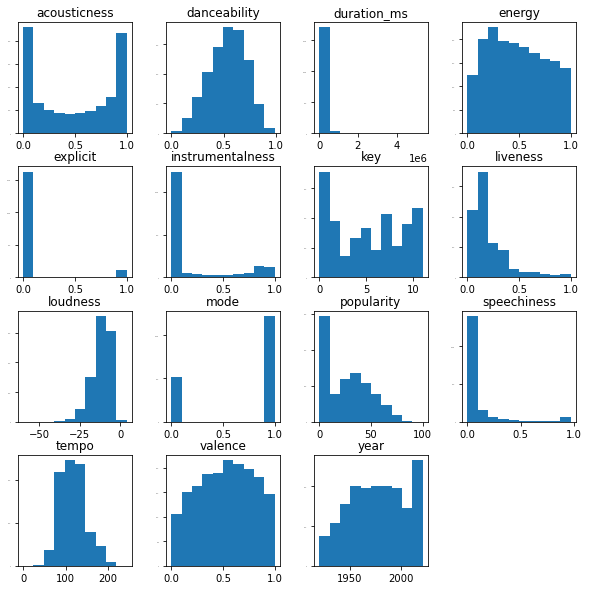

In [19]:
data_df.hist(figsize = (10,10), ylabelsize=0, grid=False)
plt.show()

In [20]:
data_df.groupby(by='year').count().sort_values(by=['popularity'], ascending=False)

acousticness  artists  danceability  duration_ms  energy  explicit  \
year                                                                       
2020          4294     4294          4294         4294    4294      4294   
2018          2714     2714          2714         2714    2714      2714   
2013          2622     2622          2622         2622    2622      2622   
2016          2349     2349          2349         2349    2349      2349   
2019          2329     2329          2329         2329    2329      2329   
...            ...      ...           ...          ...     ...       ...   
1925           279      279           279          279     279       279   
1924           236      236           236          236     236       236   
1923           185      185           185          185     185       185   
1921           156      156           156          156     156       156   
1922           121      121           121          121     121       121   

        id  instrumentalness   key  liveness  loudness  mode  name  \
year                                                                 
2020  4294              4294  4294      4294      4294  4294  4294   
2018  2714              2714  2714      2714      2714  2714  2714   
2013  2622              2622  2622      2622      2622  2622  2622   
2016  2349              2349  2349      2349      2349  2349  2349   
2019  2329              2329  2329      2329      2329  2329  2329   
...    ...               ...   ...       ...       ...   ...   ...   
1925   279               279   279       279       279   279   279   
1924   236               236   236       236       236   236   236   
1923   185               185   185       185       185   185   185   
1921   156               156   156       156       156   156   156   
1922   121               121   121       121       121   121   121   

      popularity  release_date  speechiness  tempo  valence  
year                                                         
2020        4294          4294         4294   4294     4294  
2018        2714          2714         2714   2714     2714  
2013        2622          2622         2622   2622     2622  
2016        2349          2349         2349   2349     2349  
2019        2329          2329         2329   2329     2329  
...          ...           ...          ...    ...      ...  
1925         279           279          279    279      279  
1924         236           236          236    236      236  
1923         185           185          185    185      185  
1921         156           156          156    156      156  
1922         121           121          121    121      121  

[102 rows x 18 columns]

In [21]:
data_df.groupby(by='artists').count()

acousticness  \
artists                                                            
["'In The Heights' Original Broadway Company", ...             1   
["'Til Tuesday"]                                               8   
["100 First Songs' Participants"]                              1   
["AKA ChaP in 00'S"]                                           2   
["Adolescent's Orquesta"]                                      4   
...                                                          ...   
['黑豹']                                                         1   
['龔詩嘉']                                                        1   
['김수철']                                                        1   
['김효근', 'Quinever 퀸에버']                                        1   
['조정현']                                                        1   

                                                    danceability  duration_ms  \
artists                                                                         
["'In The Heights' Original Broadway Company", ...             1            1   
["'Til Tuesday"]                                               8            8   
["100 First Songs' Participants"]                              1            1   
["AKA ChaP in 00'S"]                                           2            2   
["Adolescent's Orquesta"]                                      4            4   
...                                                          ...          ...   
['黑豹']                                                         1            1   
['龔詩嘉']                                                        1            1   
['김수철']                                                        1            1   
['김효근', 'Quinever 퀸에버']                                        1            1   
['조정현']                                                        1            1   

                                                    energy  explicit  id  \
artists                                                                    
["'In The Heights' Original Broadway Company", ...       1         1   1   
["'Til Tuesday"]                                         8         8   8   
["100 First Songs' Participants"]                        1         1   1   
["AKA ChaP in 00'S"]                                     2         2   2   
["Adolescent's Orquesta"]                                4         4   4   
...                                                    ...       ...  ..   
['黑豹']                                                   1         1   1   
['龔詩嘉']                                                  1         1   1   
['김수철']                                                  1         1   1   
['김효근', 'Quinever 퀸에버']                                  1         1   1   
['조정현']                                                  1         1   1   

                                                    instrumentalness  key  \
artists                                                                     
["'In The Heights' Original Broadway Company", ...                 1    1   
["'Til Tuesday"]                                                   8    8   
["100 First Songs' Participants"]                                  1    1   
["AKA ChaP in 00'S"]                                               2    2   
["Adolescent's Orquesta"]                                          4    4   
...                                                              ...  ...   
['黑豹']                                                             1    1   
['龔詩嘉']                                                            1    1   
['김수철']                                                            1    1   
['김효근', 'Quinever 퀸에버']                                            1    1   
['조정현']                                                            1    1   

                                                    liveness  loudness  mode  \
artists                                   

In [22]:
sns.set(font_scale=1.4) 

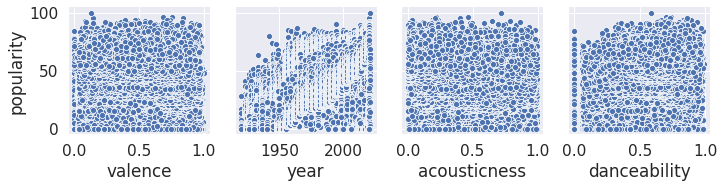

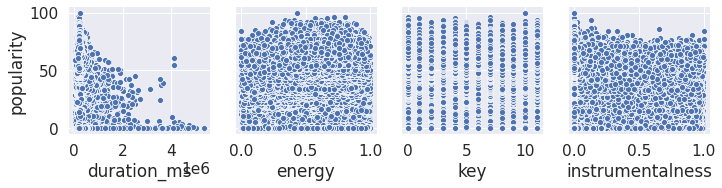

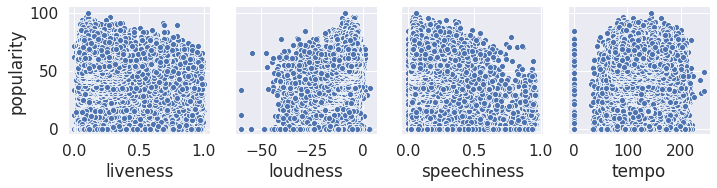

In [23]:
sns.pairplot(songs, 
             y_vars=["popularity"], 
             x_vars=['valence', 'year', 'acousticness', 'danceability'],                       
             )
sns.pairplot(songs, 
             y_vars=["popularity"], 
             x_vars=['duration_ms', 'energy', 'key', 'instrumentalness',],                       
             )
sns.pairplot(songs, 
             y_vars=["popularity"], 
             x_vars=['liveness', 'loudness', 'speechiness', 'tempo'],   
             )


In [24]:
rockmusic = music_by_genres[music_by_genres["genres"].apply(lambda x: True if 'pop' in x else False)]

In [25]:
criteria = ['valence', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 
       'liveness', 'loudness', 'speechiness', 'tempo']

In [26]:
rapmusic = music_by_genres[music_by_genres["genres"].apply(lambda x: True if 'rap' in x else False)]

In [27]:
from scipy.stats import pearsonr

In [28]:
def regplot_with_rp(data, x, y, ax):
    (r, p) = pearsonr(data[x], data[y])
    sns.regplot(
                x = x,
                y = y,
                data = data,
                order=3, 
                ax=ax,
                line_kws={'color': 'red'},
                label="r = {0:.2f} p = {1:.2E}".format(r, p),

             ).legend(loc="best")

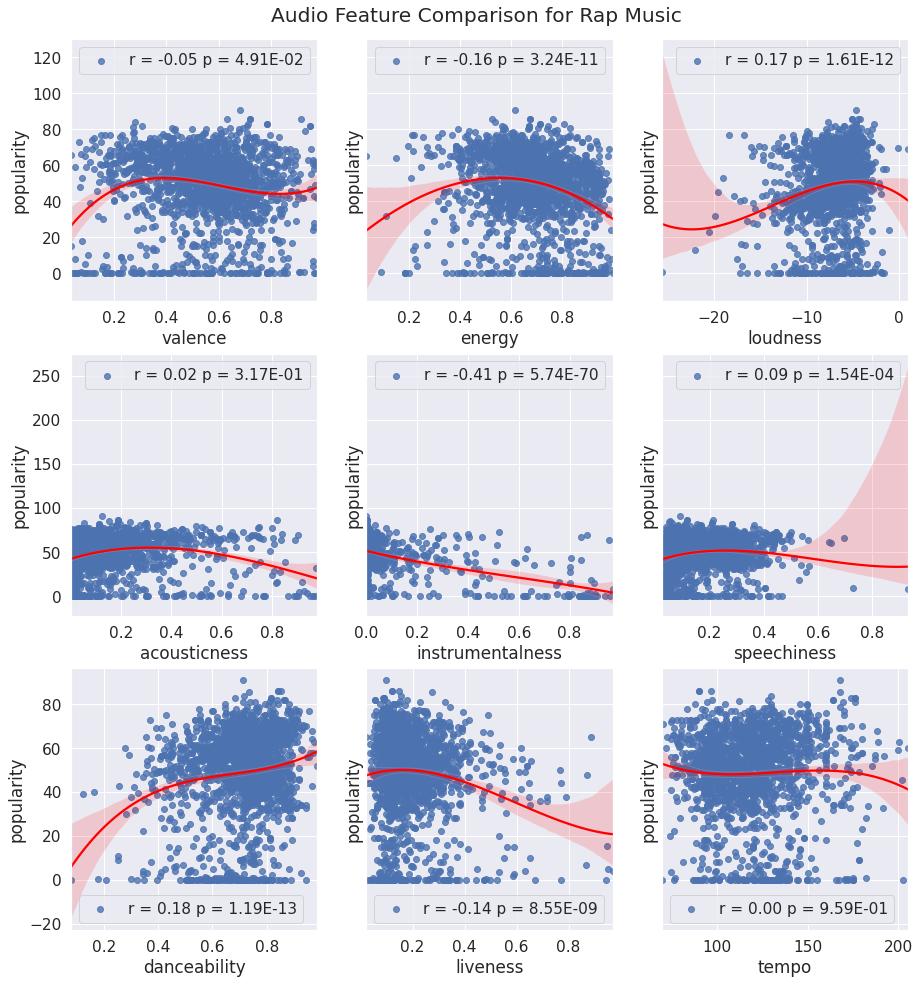

In [30]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(15,15), sharey='row')
plt.subplots_adjust(top=0.95)
fig.suptitle('Audio Feature Comparison for Rap Music')
regplot_with_rp(x ="valence", y ='popularity', data = rapmusic, ax=axs[0,0])
regplot_with_rp(x ="acousticness", y ='popularity', data = rapmusic, ax=axs[1,0])
regplot_with_rp(x ="danceability", y ='popularity', data = rapmusic, ax=axs[2,0])
regplot_with_rp(x ="energy", y ='popularity', data = rapmusic, ax=axs[0,1])
regplot_with_rp(x ="instrumentalness", y ='popularity', data = rapmusic, ax=axs[1,1])
regplot_with_rp(x ="liveness", y ='popularity', data = rapmusic, ax=axs[2,1])
regplot_with_rp(x ="loudness", y ='popularity', data = rapmusic, ax=axs[0,2])
regplot_with_rp(x ="speechiness", y ='popularity', data = rapmusic, ax=axs[1,2])
regplot_with_rp(x ="tempo", y ='popularity', data = rapmusic, ax=axs[2,2])

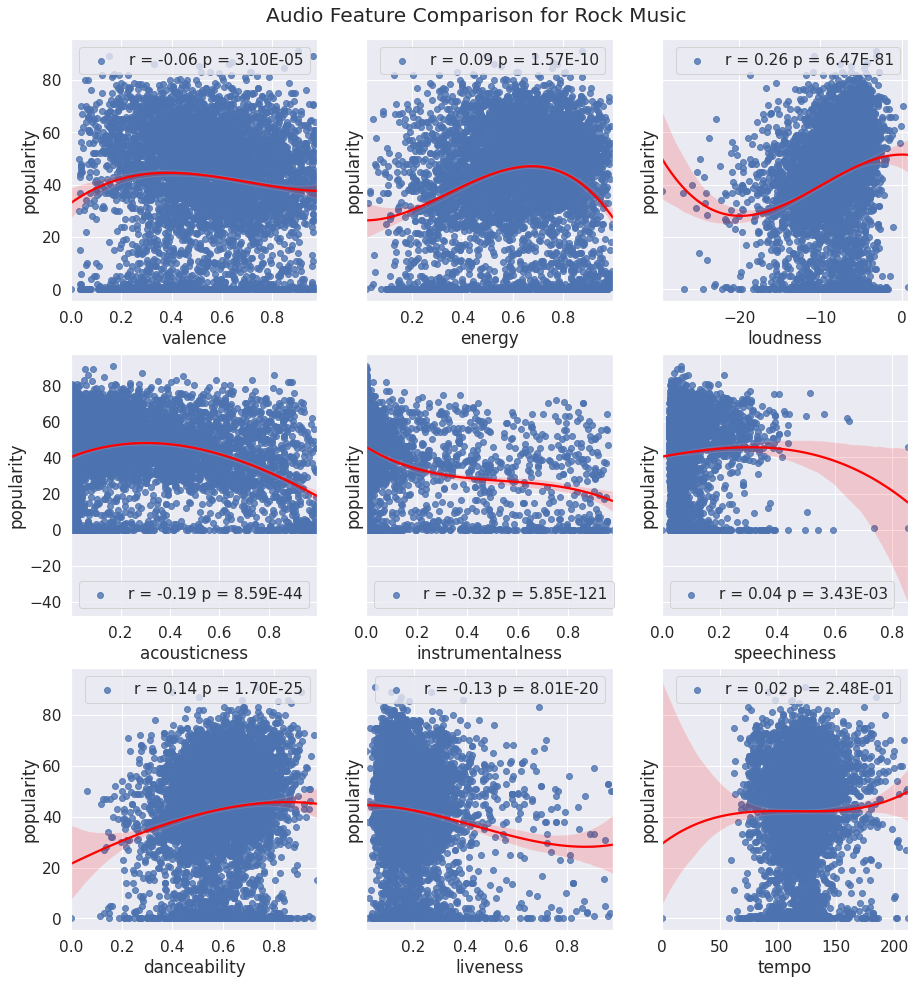

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(15,15), sharey='row')
plt.subplots_adjust(top=0.95)
fig.suptitle('Audio Feature Comparison for Rock Music')

regplot_with_rp(x ="valence", y ='popularity', data = rockmusic, ax=axs[0,0])
regplot_with_rp(x ="acousticness", y ='popularity', data = rockmusic, ax=axs[1,0])
regplot_with_rp(x ="danceability", y ='popularity', data = rockmusic, ax=axs[2,0])
regplot_with_rp(x ="energy", y ='popularity', data = rockmusic, ax=axs[0,1])
regplot_with_rp(x ="instrumentalness", y ='popularity', data = rockmusic, ax=axs[1,1])
regplot_with_rp(x ="liveness", y ='popularity', data = rockmusic, ax=axs[2,1])
regplot_with_rp(x ="loudness", y ='popularity', data = rockmusic, ax=axs[0,2])
regplot_with_rp(x ="speechiness", y ='popularity', data = rockmusic, ax=axs[1,2])
regplot_with_rp(x ="tempo", y ='popularity', data = rockmusic, ax=axs[2,2])



In [32]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [33]:
def artifact_plot (genre, artifact):
    music  = music_by_genres[music_by_genres["genres"].apply(lambda x: True if genre in x else False)]
    x = (music[artifact])[:,np.newaxis]
    y = (music['popularity'])[:,np.newaxis]
    model = sm.OLS(y, x).fit()
    ypred = model.predict(x) 
    polynomial_features= PolynomialFeatures(degree=3)
    xp = polynomial_features.fit_transform(x)
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp) 
    model.params
    x = [model.params[0] +  v*model.params[1] + v*v*model.params[2] + model.params[3]*v*v*v  for v in np.arange(0., 1, 0.0002)]
    labeltext =  "{0}".format(genre)
    plt.plot(np.arange(0., 1, 0.0002), x, label = labeltext)
    
def energy_plot (genre):
    artifact_plot (genre, "energy")

Text(0, 0.5, 'popularity')

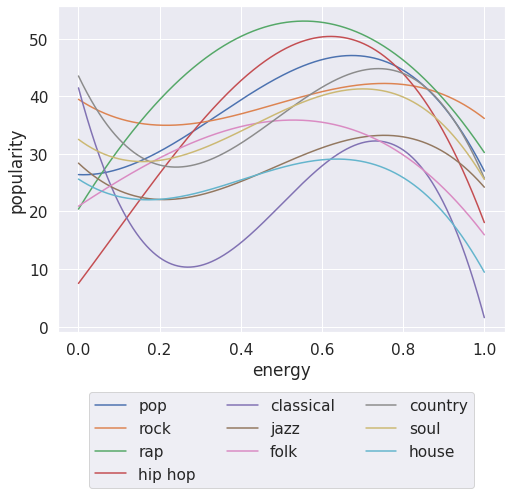

In [34]:
top10genres = genre_count_df.sort_values(by=[1], ascending=False)[:10][0]
plt.figure(figsize=(8, 6))
[energy_plot(genre) for genre in top10genres]
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 3) 
plt.xlabel('energy')
plt.ylabel('popularity')


Text(0, 0.5, 'popularity')

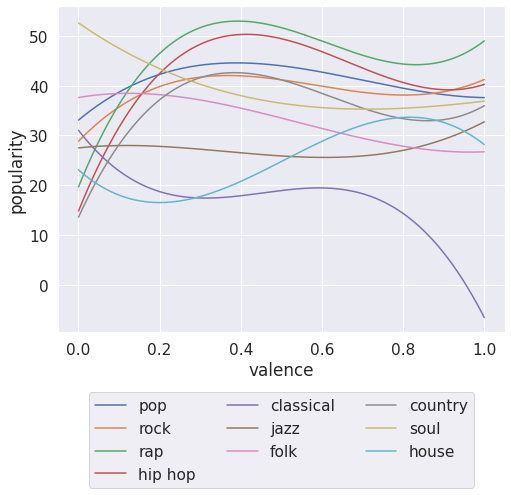

In [35]:
plt.figure(figsize=(8, 6))
[artifact_plot(genre, "valence") for genre in top10genres]
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 3) 
plt.xlabel('valence')
plt.ylabel('popularity')

In [36]:
top10genres

2440          pop
1684         rock
1471          rap
2528      hip hop
2241    classical
894          jazz
3019         folk
720       country
2944         soul
475         house
Name: 0, dtype: object

In [37]:
def genre_comparison (sound_attribute):
    plt.figure(figsize=(8, 6))
    [artifact_plot(genre, sound_attribute) for genre in top10genres]
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 3) 
    plt.xlabel(sound_attribute)
    plt.ylabel('popularity')

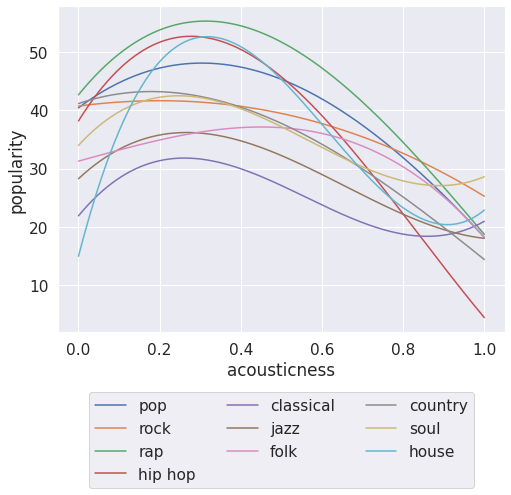

In [38]:
genre_comparison("acousticness")

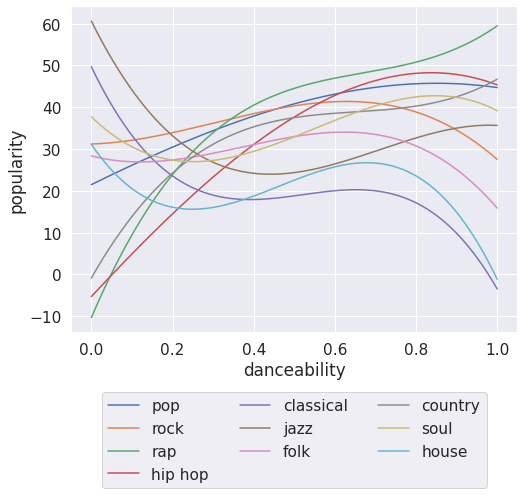

In [39]:
genre_comparison("danceability")

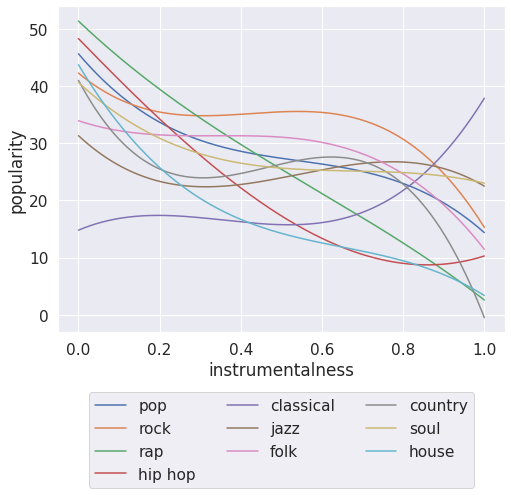

In [40]:
genre_comparison("instrumentalness")

Check if classical music line is correct

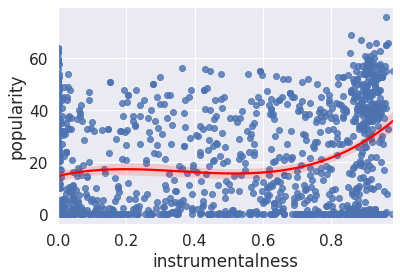

In [41]:
classicalmusic  = music_by_genres[music_by_genres["genres"].apply(lambda x: True if "classical" in x else False)]
sns.regplot(x ="instrumentalness", y ='popularity', data = classicalmusic, order=3, line_kws={'color': 'red'})


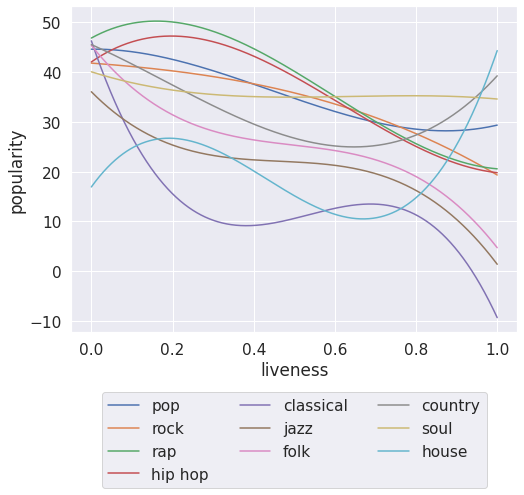

In [42]:
genre_comparison("liveness")

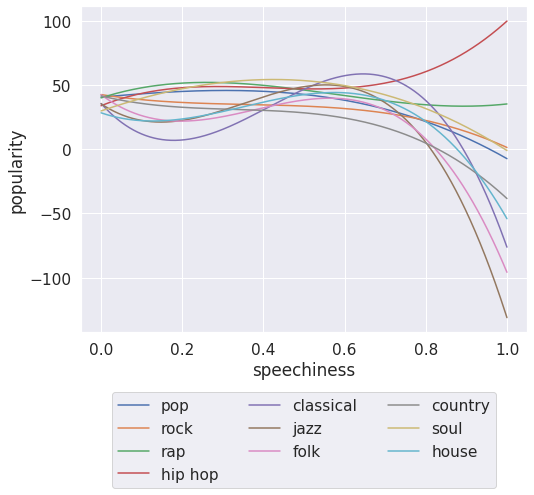

In [43]:
genre_comparison("speechiness")

Check if classical music line is correct, and look for certainty for high speechiness values

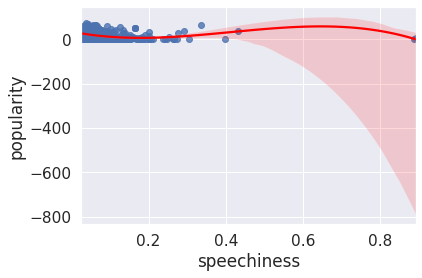

In [44]:
sns.regplot(x ="speechiness", y ='popularity', data = classicalmusic, order=3, line_kws={'color': 'red'})